# GRO620 - Activité procédurale 2

Dans cette activité procédurale, nous allons poser les bases dufiltrage numérique d'images. Vous reconnaîtrez des éléments du filtrage numérique que vous avez vu en S4.

Pour chaque question impliqant de la programmation, commencez par discuter de la procédure à suivre pour résoudre le problème. Nous validerons l'approche en classe avant de se lancer dans l'implémentation.

In [169]:
# Préambule

import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Filtrage point à point

### Q1.1

Soit cette image (chargée par OpenCV et affichée par matplotlib): 

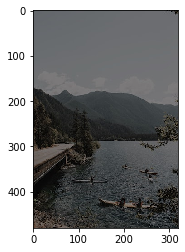

In [170]:
img_q11_org = cv2.imread("images_doc/proc2-q1-dock.jpeg")
img_q11_rgb = cv2.cvtColor(img_q11_org, cv2.COLOR_BGR2RGB) # Équivalent de la question Q3.1.c de l'activité procédurale 1.
plt.imshow(img_q11_rgb)

(Source de l'image originale : [Vlada Karpovich, Pexels](https://www.pexels.com/photo/snow-wood-landscape-mountains-4450090/))

Cette fonction affiche l'histogramme des trois composantes de l'image :

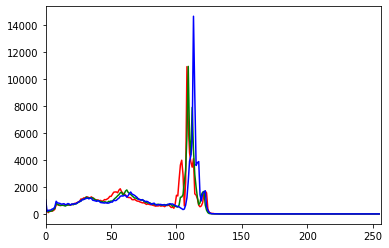

In [171]:
channels = ('r','g','b')
for i, col in enumerate(channels):
    hist = cv2.calcHist([img_q11_rgb], [i], None, [256], [0,256])
    plt.plot(hist,color = col)
    plt.xlim([0,256])

Ajustez la plage dynamique en luminosité de l'image pour qu'elle couvre l'ensemble des valeurs possibles.

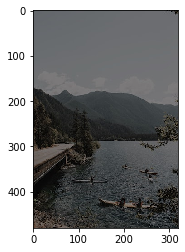

In [172]:
# NOTE: On convertit d'abord en float32 dans la plage [0,1] pour
# simplifier la manipulation des images avec des facteurs non-entiers.
# Matplotlib détecte ceci et affichera l'image correctement.
img_q11_f = np.float32(img_q11_rgb) / 255.0

img_q11_out = img_q11_f.copy() # À remplacer !

plt.imshow(img_q11_out)

## Q1.2

Soit maintenant cette image :

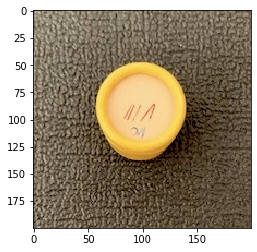

In [173]:
img_q12_org = cv2.imread("images_doc/proc2-q1-object.jpeg")
img_q12_rgb = cv2.cvtColor(img_q12_org, cv2.COLOR_BGR2RGB) # Équivalent de la question Q3.1.c de l'activité procédurale 1.
plt.imshow(img_q12_rgb)

Tentez de mettre en place un algorithme basé sur la luminosité permettant d'éliminer l'arrière-plan de cette image pour qu'il ne reste que l'objet en jaune sur un fond le plus noir possible.

In [174]:
img_q12_filt = img_q12_rgb.copy()
W = img_q12_filt.shape[1] # NOTE: L'ordre des dimensions est Y puis X ("row-major")
H = img_q12_filt.shape[0]


## Filtrage linéaire

### Q2.1 

Soit l'image suivante ainsi que sa transformée de Fourier :

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff80d0c8310>,
 <matplotlib.image.AxesImage at 0x7ff80c443490>)

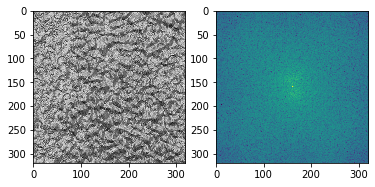

In [175]:
img_q2_org  = cv2.imread("images_doc/proc2-q2-texture.jpeg")
img_q2_mono = np.float32(cv2.cvtColor(img_q2_org, cv2.COLOR_BGR2GRAY)) / 255.0

def get_fft_mag(img):
    img_fft = np.fft.fft2(img)
    img_fft = np.fft.fftshift(img_fft)
    img_fft = 20*np.log(np.abs(img_fft))
    return img_fft
    
img_q2_fft = get_fft_mag(img_q2_mono)

plt.subplot(121),plt.imshow(img_q2_mono, cmap="gray")
plt.subplot(122),plt.imshow(img_q2_fft)

(Source de l'image originale : [Hoang Le, Pexels](https://www.pexels.com/photo/black-and-white-black-and-white-pattern-rough-978462/)).

**a)** Filtrez cette image à l'aide d'une convolution de façon à ce que la valeur de chaque pixel soit la valeur moyenne de ses voisins dans un carré de 15x15.

In [183]:
filter_kernel = np.zeros((15,15))


**b)** Comparez le résultat avec celui de la fonction cv2.GaussianBlur() avec un noyau de convolution de la même taille.

In [184]:
img_q2_blur = img_q2_rgb.copy()


**c)** Comment expliquez-vous la différence ?

*(réponse ici)*

### Q2.2

Utilisez un filtre linéaire pour extraire les contours de l'image fournie en Q1.2.

In [178]:
img_q12_contour = img_q12_rgb.copy()

## Filtrage non-linéaire

### Q3.1

Soit cette image :

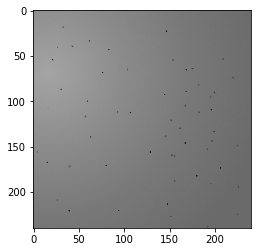

In [179]:
img_q3_org = cv2.imread("images_doc/proc2-q3-sand.png")
img_q3_rgb = cv2.cvtColor(img_q3_org, cv2.COLOR_BGR2RGB)
plt.imshow(img_q3_rgb)

Utilisez un filtre non-linéaire pour retirer les taches noires sur la figure.

In [180]:
img_q3_fixed = img_q3_rgb.copy()

## Filtrage morphologique et chaîne de traitement

### Q4.1 

À partir de l'image de la question Q1.2, combinez les filtres vus plus tôt pour ne conserver que le contour de l'objet de la figure (donc sans bruit de fond).

In [181]:
img_q12_clean = img_q12_rgb.copy()